In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('H:/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Checking For Missing Data

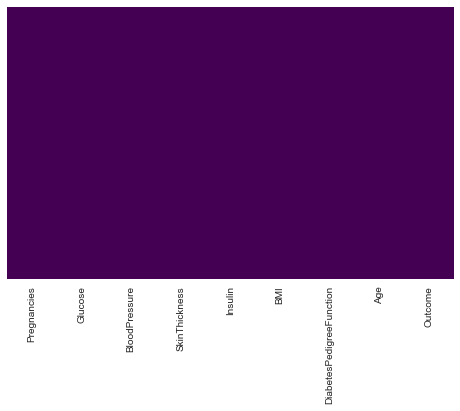

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull() , yticklabels=False , cbar=False,cmap='viridis')

### Checking the values of Target Variable or Data Imbalance

In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Figure size 576x648 with 0 Axes>

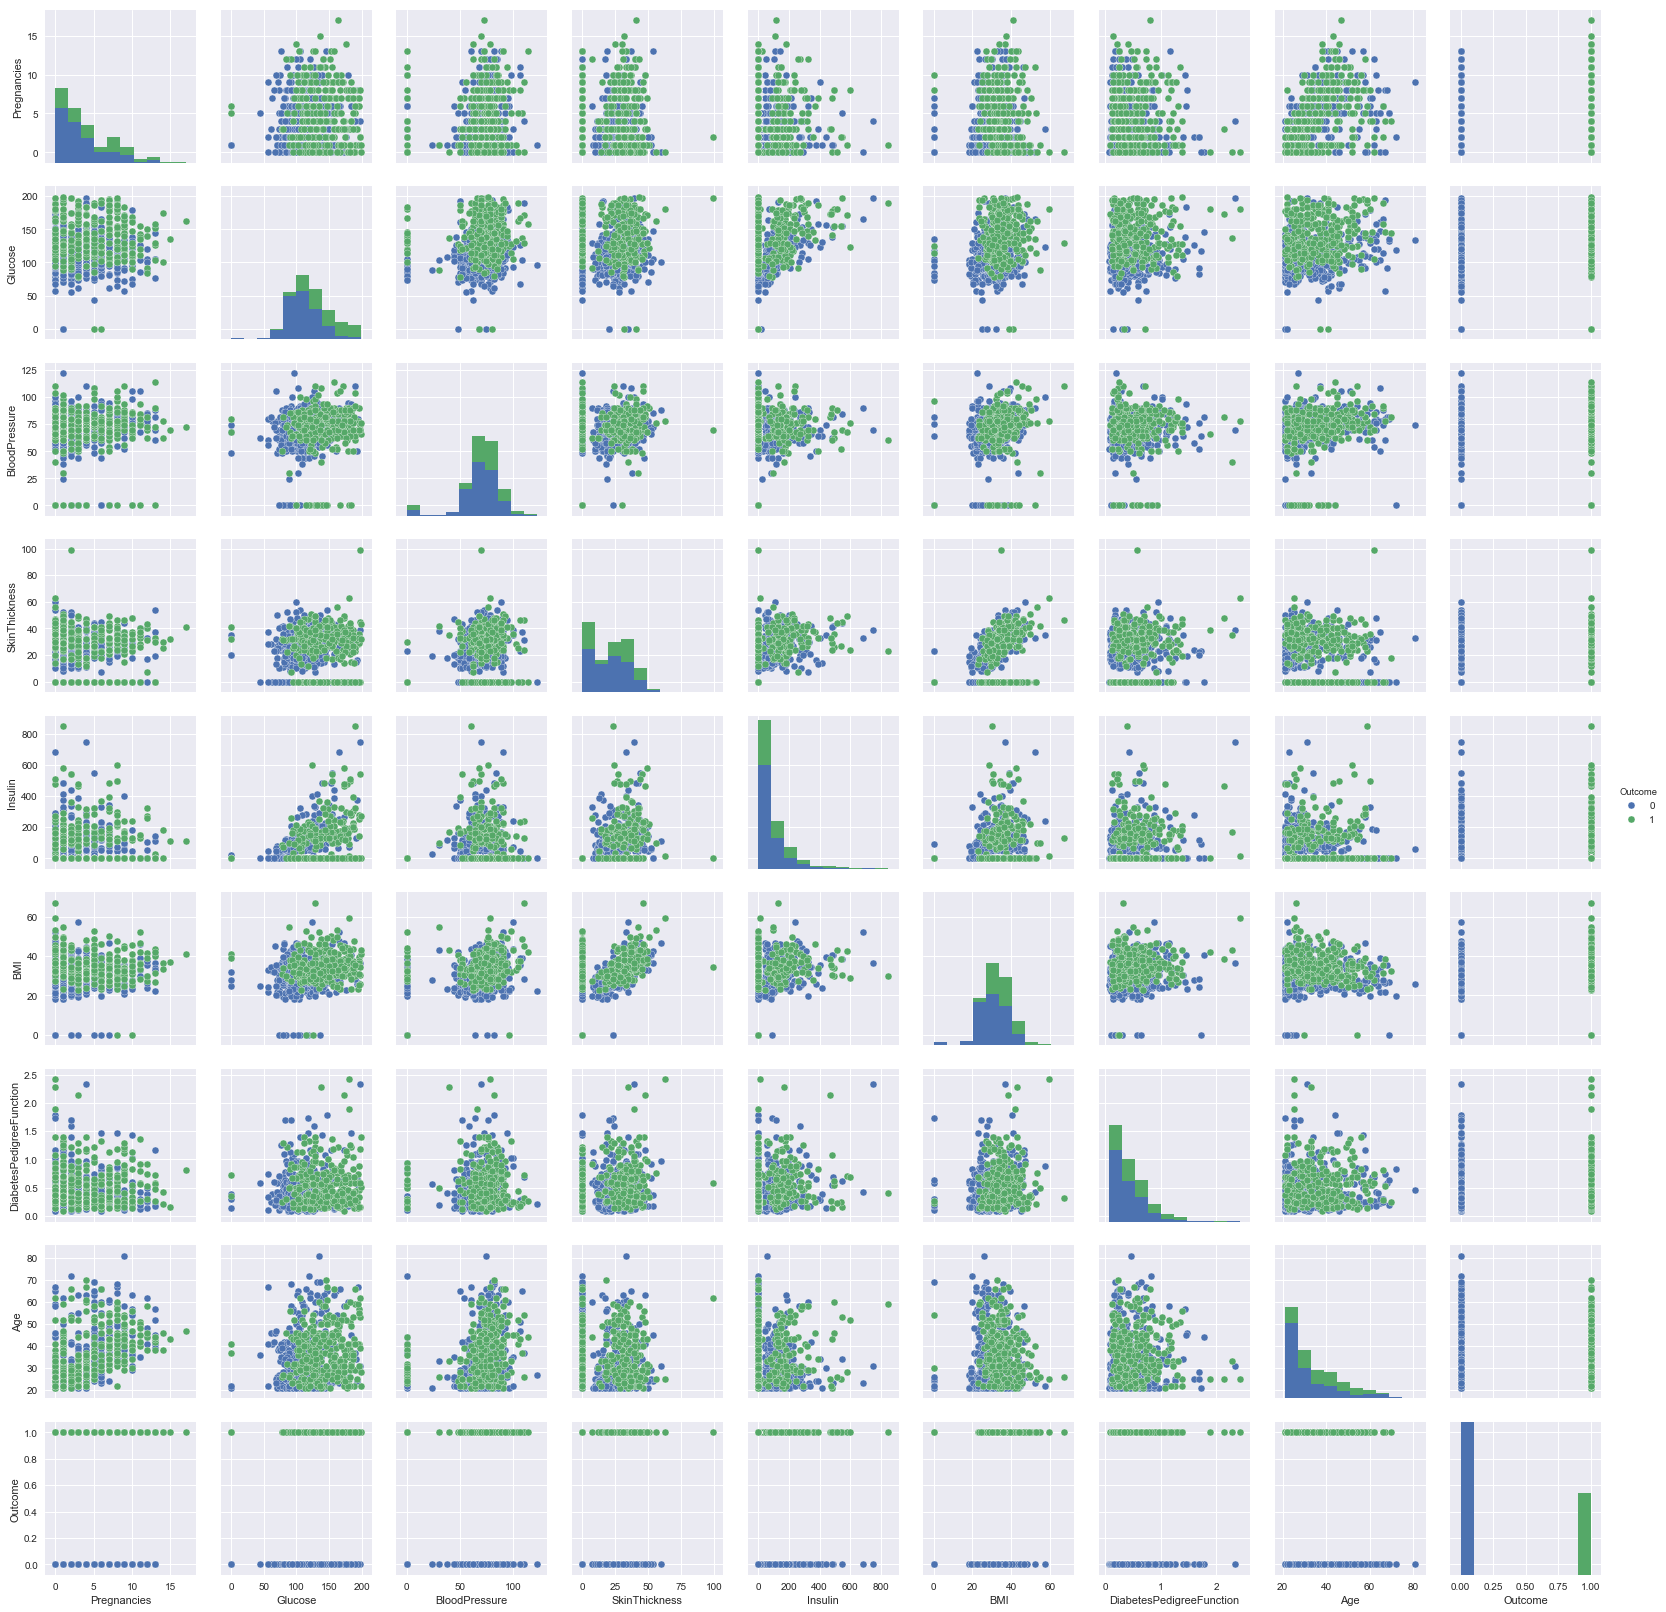

In [9]:
plt.figure(figsize=(8,9))
sns.pairplot(data , hue = 'Outcome')

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


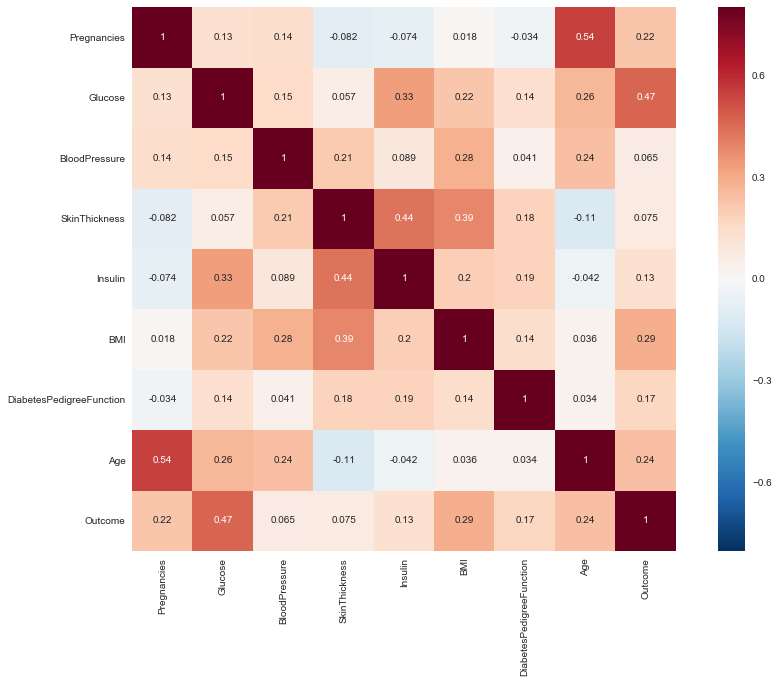

In [11]:
corrmat = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrmat , vmax =.8 , square=True , annot = True)

In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

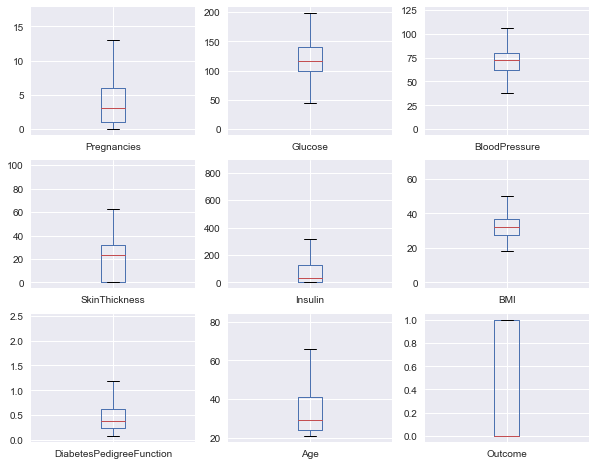

In [13]:
data.plot(kind = 'box' , subplots=True , layout=(3,3), sharex =False , sharey = False , figsize=(10,8))

Text(0,0.5,'Count')

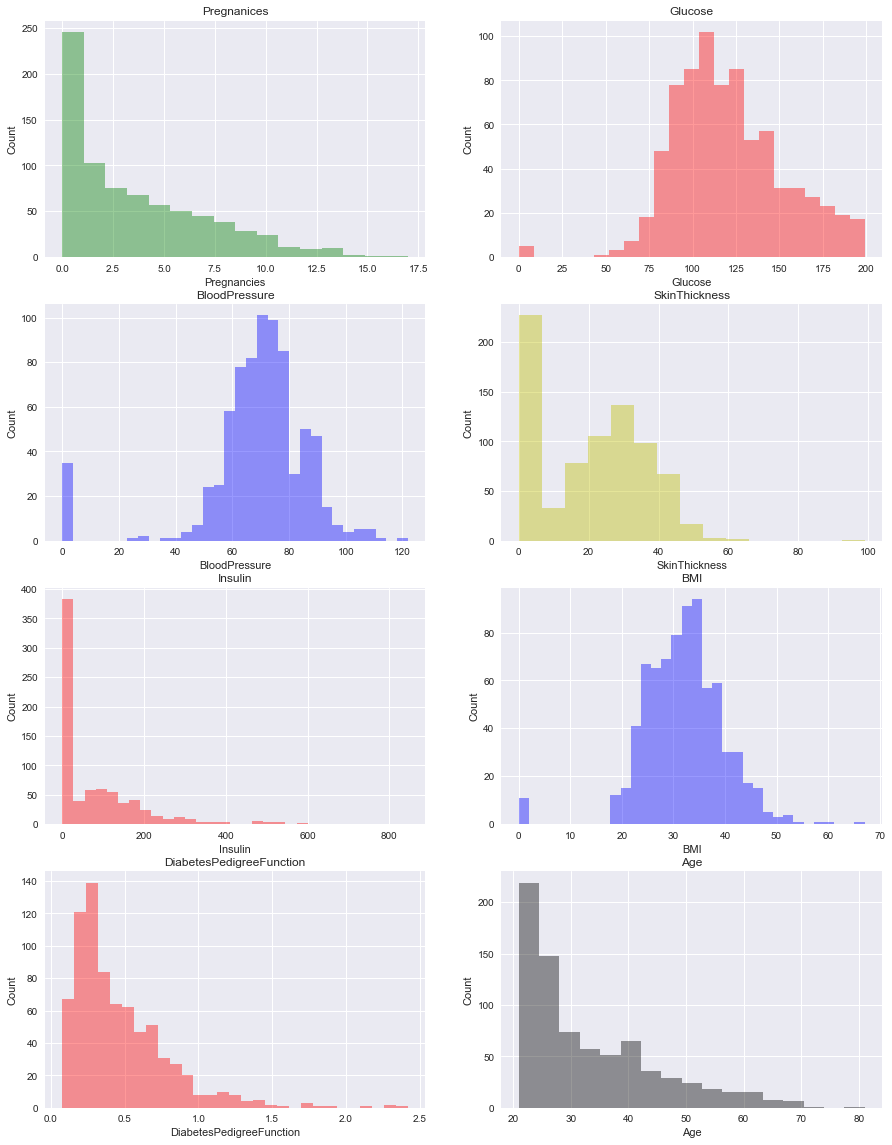

In [22]:
f , axes = plt.subplots(nrows= 4 , ncols = 2 , figsize=(15,20))


sns.distplot(data.Pregnancies , kde = False , color = 'g' , ax = axes[0][0]).set_title('Pregnanices') 
axes[0][0].set_ylabel('Count')


sns.distplot(data.Glucose , kde = False , color ='r' , ax = axes[0][1]).set_title('Glucose')
axes[0][1].set_ylabel('Count')


sns.distplot(data.BloodPressure , kde = False , color ='b' , ax = axes[1][0]).set_title('BloodPressure')
axes[1][0].set_ylabel('Count')


sns.distplot(data.SkinThickness , kde = False , color ='y' , ax = axes[1][1]).set_title('SkinThickness')
axes[1][1].set_ylabel('Count')



sns.distplot(data.Insulin , kde = False , color ='r' , ax = axes[2][0]).set_title('Insulin')
axes[2][0].set_ylabel('Count')


sns.distplot(data.BMI , kde = False , color ='b' , ax = axes[2][1]).set_title('BMI')
axes[2][1].set_ylabel('Count')


sns.distplot(data.DiabetesPedigreeFunction , kde = False , color ='r' , ax = axes[3][0]).set_title('DiabetesPedigreeFunction')
axes[3][0].set_ylabel('Count')



sns.distplot(data.Age , kde = False , color ='black' , ax = axes[3][1]).set_title('Age')
axes[3][1].set_ylabel('Count')





In [25]:
pima_new= data

In [26]:
pima_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
pima_new  =  pima_new[pima_new['Pregnancies']<13]
pima_new  =  pima_new[pima_new['Glucose']>30]



pima_new =pima_new[pima_new['BMI']>10]
pima_new = pima_new[pima_new['BMI']<50]

pima_new = pima_new[pima_new['DiabetesPedigreeFunction']<1.2]
pima_new = pima_new[pima_new['Age'] <65]

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

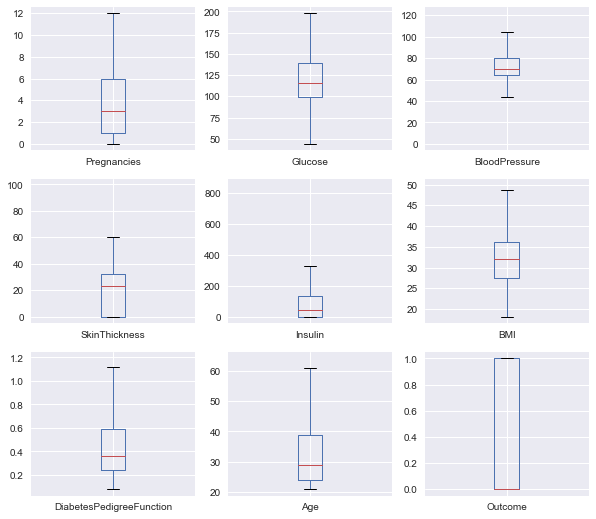

In [28]:
pima_new.plot(kind='box' , subplots=True , layout=(3,3) , sharex=False, sharey=False , figsize=(10,9))

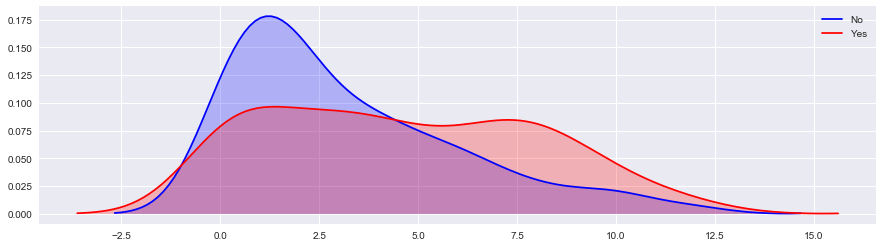

In [35]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'Pregnancies'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'Pregnancies'] , color='r',shade=True, label='Yes')

Text(0.5,1,'Glucose vs Yes or No')

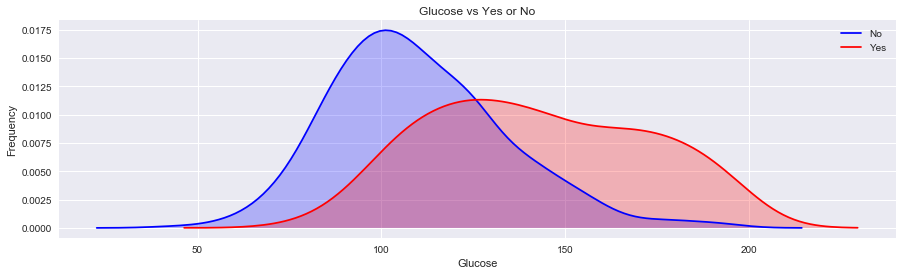

In [36]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'Glucose'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'Glucose'] , color='r',shade=True, label='Yes')
ax.set(xlabel='Glucose', ylabel='Frequency')
plt.title('Glucose vs Yes or No')

Text(0.5,1,'BMI vs Yes or No')

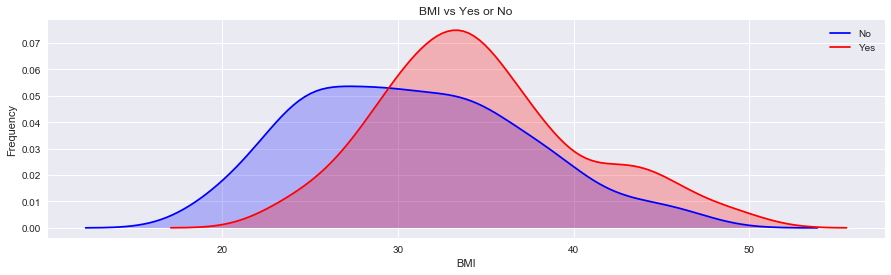

In [37]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'BMI'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'BMI'] , color='r',shade=True, label='Yes')
ax.set(xlabel='BMI', ylabel='Frequency')
plt.title('BMI vs Yes or No')


Text(0.5,1,'DiabetesPedigreeFunction vs Yes or No')

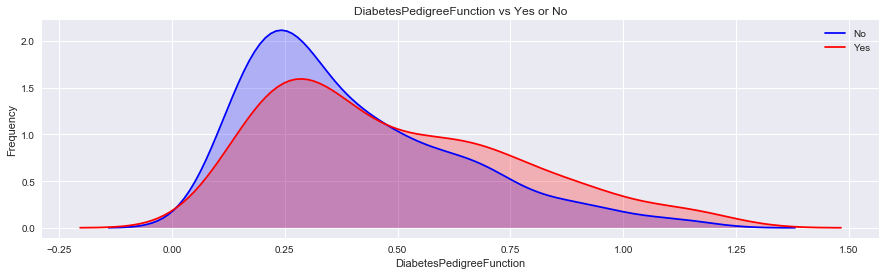

In [38]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'DiabetesPedigreeFunction'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'DiabetesPedigreeFunction'] , color='r',shade=True, label='Yes')
ax.set(xlabel='DiabetesPedigreeFunction', ylabel='Frequency')
plt.title('DiabetesPedigreeFunction vs Yes or No')

Text(0.5,1,'Age vs Yes or No')

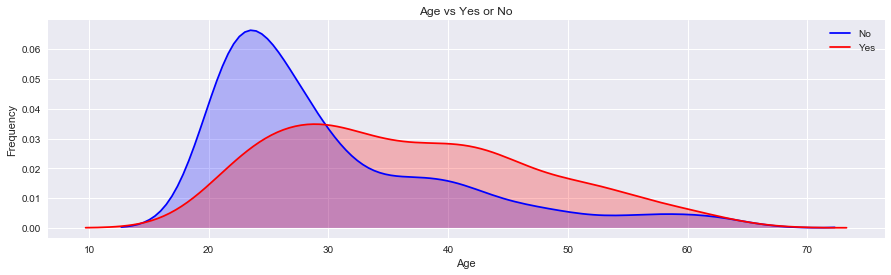

In [39]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 0),'Age'] , color='b',shade=True,label='No')
ax=sns.kdeplot(pima_new.loc[(pima_new['Outcome'] == 1),'Age'] , color='r',shade=True, label='Yes')
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('Age vs Yes or No')

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train , X_test , y_train , y_test = train_test_split(pima_new.drop('Outcome' , axis = 1) , pima_new['Outcome'], test_size=0.30 , random_state=123)

In [42]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [43]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics




def classification_cv(model):
    kfold = model_selection.KFold(n_splits=10 , random_state=7 )
    scoring = 'accuracy'
    results = model_selection.cross_val_score(model , X_train_transformed,y_train,cv=kfold, scoring=scoring)
    
    return(print('Accuracy :%.3f (%.3f)')%(result.mean(), result.std()))

In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)



dtree = tree.DecisionTreeClassifier(class_weight = 'balanced' , min_weight_fraction_leaf =0.01)
dtree = dtree.fit(X_train_transformed , y_train)


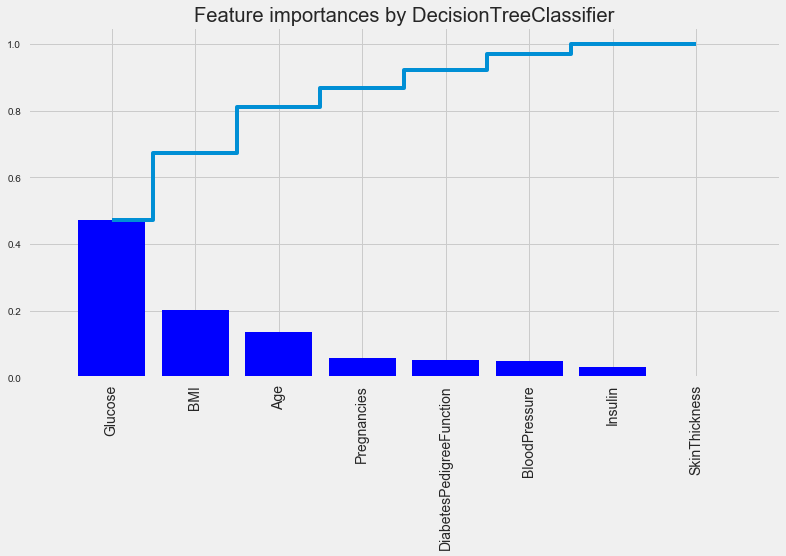

In [51]:
importances = dtree.feature_importances_
feat_names = pima_new.drop(['Outcome'] , axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))

plt.title('Feature importances by DecisionTreeClassifier')
plt.bar(range(len(indices)) , importances[indices] , color = 'blue' , align='center')
plt.step(range(len(indices)) , np.cumsum(importances[indices]),where='mid', label = 'Cumulative')
plt.xticks(range(len(indices)) , feat_names[indices] , rotation = 'vertical', fontsize=14)

plt.xlim([-1 , len(indices)])
plt.show()

In [52]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [53]:
y_base_rate = base_rate_model(X_test_transformed)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.65


In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, y_base_rate)
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, y_base_rate))
print ("---Confusion Matrix---")
print(confusion_matrix(y_test, y_base_rate))


---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.65      1.00      0.79       134
          1       0.00      0.00      0.00        73

avg / total       0.42      0.65      0.51       207

---Confusion Matrix---
[[134   0]
 [ 73   0]]
